In [2]:
import pandas as pd
df_no_action_9 = pd.read_csv('soha_user_no_action_9_analysis.csv')

In [3]:
df_no_action_9

,deviceId,date,dt,itemId,eventId,pageLoadId,pageId,Boxid
0,057989E9-D5E0-4820-86F2-E4AB3CBAA655,2024-08-14,2024-08-14 21:05:41,1.982408e+17,22,1723644341551,10006,-1
1,057989E9-D5E0-4820-86F2-E4AB3CBAA655,2024-08-14,2024-08-14 21:05:41,1.982408e+17,22,1723644341892,10006,-1
2,057989E9-D5E0-4820-86F2-E4AB3CBAA655,2024-08-14,2024-08-14 21:05:41,1.982408e+17,22,1723644341511,10006,-1
3,057989E9-D5E0-4820-86F2-E4AB3CBAA655,2024-08-14,2024-08-14 21:05:38,1.982408e+17,22,1723644338941,10001,-1
4,057989E9-D5E0-4820-86F2-E4AB3CBAA655,2024-08-14,2024-08-14 21:05:41,1.982408e+17,22,1723644341523,10006,-1
...,...,...,...,...,...,...,...,...
2404823,eee08b53804ac63b,2024-08-06,2024-08-06 08:13:50,1.982408e+17,14,1722906833275,10001,-1
2404824,eee08b53804ac63b,2024-08-06,2024-08-06 08:13:23,1.982408e+17,22,1722906813275,10001,-1
2404825,eee08b53804ac63b,2024-08-06,2024-08-06 08:13:29,1.048800e+04,22,1722906813275,10001,-1
2404826,eee08b53804ac63b,2024-08-06,2024-08-06 08:13:36,1.982408e+17,14,1722906823273,10001,-1


In [4]:
df_no_action_9['itemId'] = df_no_action_9['itemId'].fillna(0)  # Thay NaN bằng 0, hoặc có thể dùng giá trị khác tùy ý
df_no_action_9['itemId'] = df_no_action_9['itemId'].apply(lambda x: int(float(x)) if x != '' else 0)

In [19]:
import pandas as pd

df_filtered = df_no_action_9[df_no_action_9['eventId'].isin([2008, 2009])].drop_duplicates()

df_result = df_filtered.groupby(['deviceId', 'date', 'eventId']).agg({'itemId': 'count'}).reset_index()

# Pivot để chuyển các giá trị eventId thành cột
df_result = df_result.pivot_table(
    index=['deviceId', 'date'],
    columns='eventId',
    values='itemId',
    fill_value=0
).reset_index()

df_result = df_result.rename(columns={2008: 'receive_noti', 2009: 'click_noti'})

df_result

eventId,deviceId,date,receive_noti,click_noti
0,00196a54fec562de,2024-08-01,4,0
1,00196a54fec562de,2024-08-02,6,1
2,00196a54fec562de,2024-08-03,9,0
3,00196a54fec562de,2024-08-04,10,0
4,00196a54fec562de,2024-08-05,6,0
...,...,...,...,...
112158,ffeea555a1a04bb6,2024-08-27,8,0
112159,ffeea555a1a04bb6,2024-08-28,6,0
112160,ffeea555a1a04bb6,2024-08-29,8,0
112161,ffeea555a1a04bb6,2024-08-30,7,0


In [20]:
df_result_1=df_result.groupby('deviceId').agg(receive_noti=('receive_noti','mean'),click_noti=('click_noti','mean')).reset_index()
df_result_1['receive_noti'] = df_result_1['receive_noti'].round(0)
df_result_1

,deviceId,receive_noti,click_noti
0,00196a54fec562de,6.0,0.032258
1,0021ce02bd1067a8,12.0,0.052632
2,002270ddd580d1e6,9.0,0.066667
3,002a2111da49053b,12.0,0.217391
4,002e3f867749d42b,3.0,0.000000
...,...,...,...
7115,ffb8a410933e63ca,6.0,0.000000
7116,ffc03f837db8fe50,5.0,0.000000
7117,ffcccddfa419e21c,15.0,0.032258
7118,ffdb06935dc9d578,6.0,0.000000


In [87]:
df_0_noti=df_result_1[df_result_1['receive_noti']==0].sort_values('click_noti', ascending=False)
df_0_noti

,deviceId,receive_noti,click_noti
4603,B1A5A674-C68C-4A1E-BB1B-5E359D4A6826,0.0,32.250000
1202,2F8B29A5-F603-45DF-A58B-7F31DF8754B3,0.0,25.769231
929,21E478F1-27C0-47FA-A434-83902358AFA2,0.0,16.250000
4736,C15813C3-6871-4E88-9B2F-45D7D0F4A02B,0.0,13.000000
5201,F88E64D7-0567-42E6-818E-D36BC16D6B1D,0.0,12.000000
...,...,...,...
4997,E1694EE2-9161-411C-9F72-41E373C6054C,0.0,0.500000
2553,5BD337AB-9C05-4264-B8CA-526E12C25552,0.0,0.500000
4541,A8EC7249-1C13-4E14-A451-0FE5800AD5D7,0.0,0.500000
3923,8F9D9949-3F47-47F5-B5DB-0435E9621EF1,0.0,0.500000


# Số noti nhận trung bình

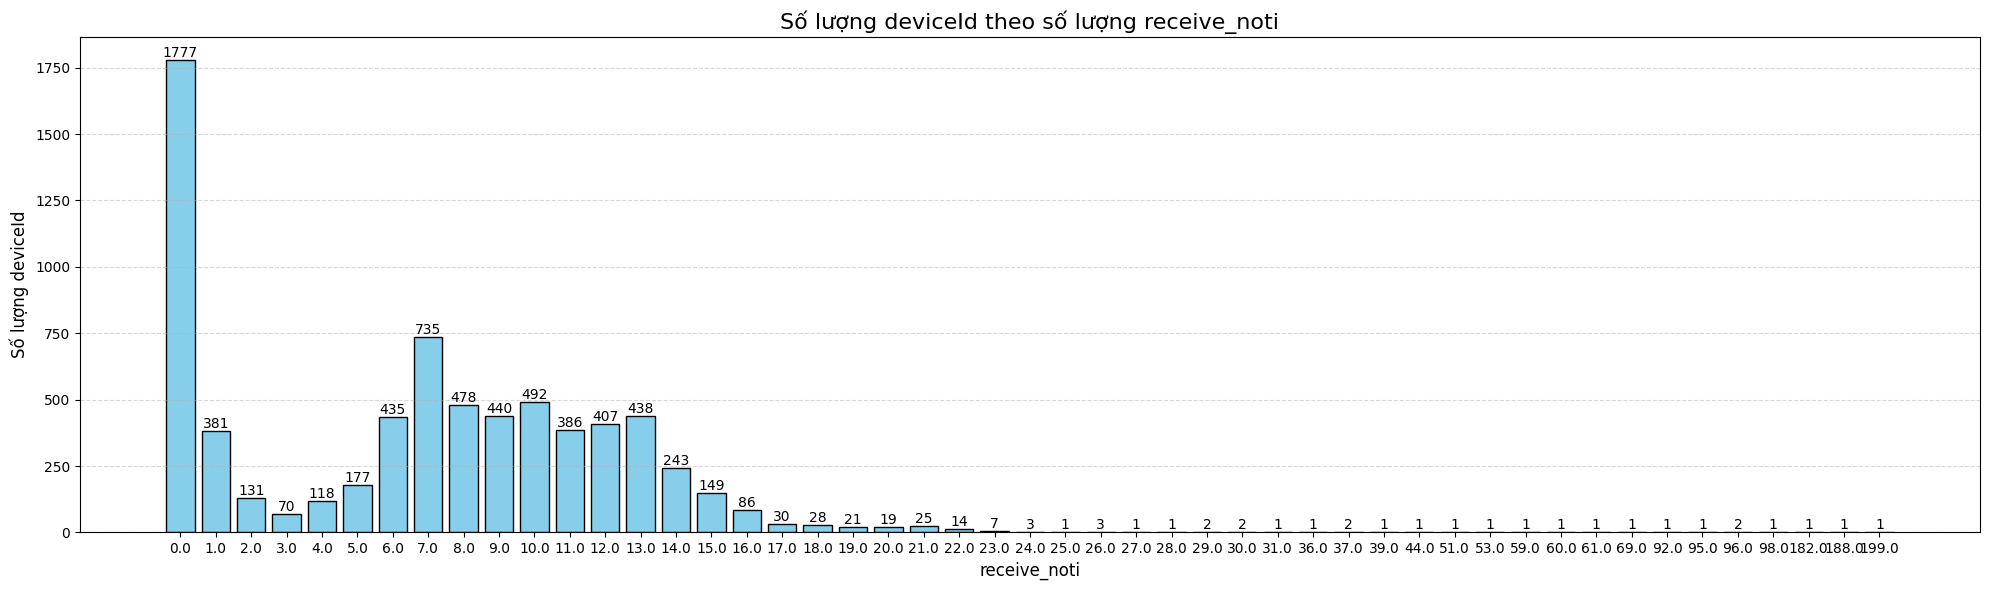

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

receive_noti_counts = df_result_1['receive_noti'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
bars = plt.bar(receive_noti_counts.index.astype(str), receive_noti_counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),  # Y-coordinate
        f'{int(bar.get_height())}',  # Nội dung nhãn
        ha='center', va='bottom', fontsize=10
    )

plt.title('Số lượng deviceId theo số lượng receive_noti', fontsize=16)
plt.xlabel('receive_noti', fontsize=12)
plt.ylabel('Số lượng deviceId', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


# Tần suất active

In [42]:
df_result_2=df_no_action_9[df_no_action_9['eventId']!=2008]
df_result_2 = df_result_2.groupby('deviceId').agg(active_date=('date', 'nunique')).reset_index()
df_result_2

,deviceId,active_date
0,00088784-9C4C-455C-9FDB-780466E94631,3
1,00196a54fec562de,1
2,0021ce02bd1067a8,2
3,002270ddd580d1e6,4
4,0027EC9F-EF4A-447D-94D8-63BCB26479AE,1
...,...,...
13160,ffb8a410933e63ca,1
13161,ffc03f837db8fe50,1
13162,ffcccddfa419e21c,2
13163,ffdb06935dc9d578,1


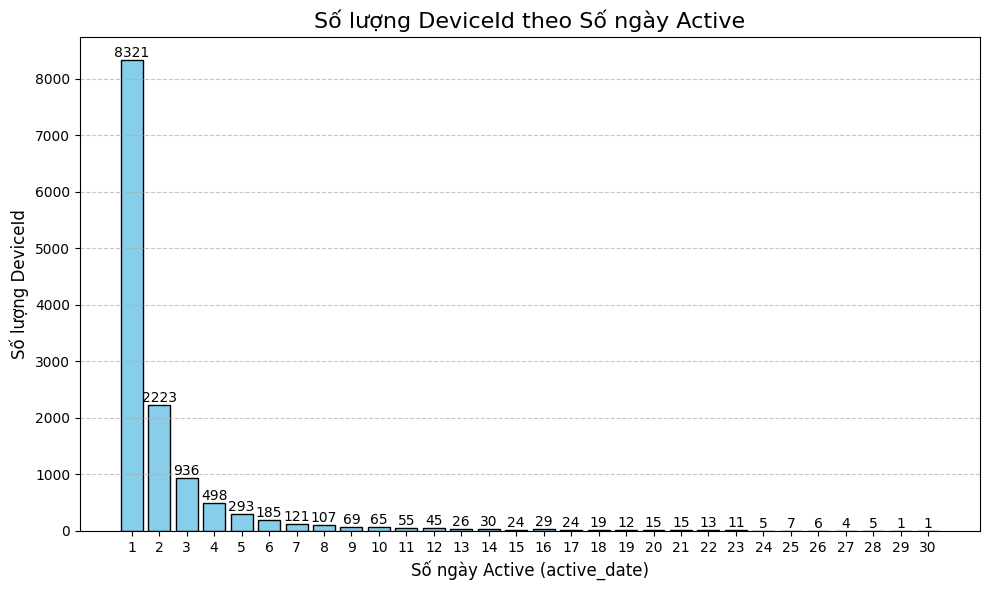

In [43]:
import matplotlib.pyplot as plt

active_date_counts = df_result_2['active_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(active_date_counts.index.astype(str), active_date_counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),  # Y-coordinate
        f'{int(bar.get_height())}',  # Nội dung nhãn
        ha='center', va='bottom', fontsize=10
    )

plt.title('Số lượng DeviceId theo Số ngày Active', fontsize=16)
plt.xlabel('Số ngày Active (active_date)', fontsize=12)
plt.ylabel('Số lượng DeviceId', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Số ngày active của nhóm user không nhận được noti của tháng

In [44]:
df_result_0=df_result_1[df_result_1['receive_noti']==0]

In [45]:
df_0 = df_result_2.merge(df_result_0[['deviceId']], on='deviceId', how='inner')

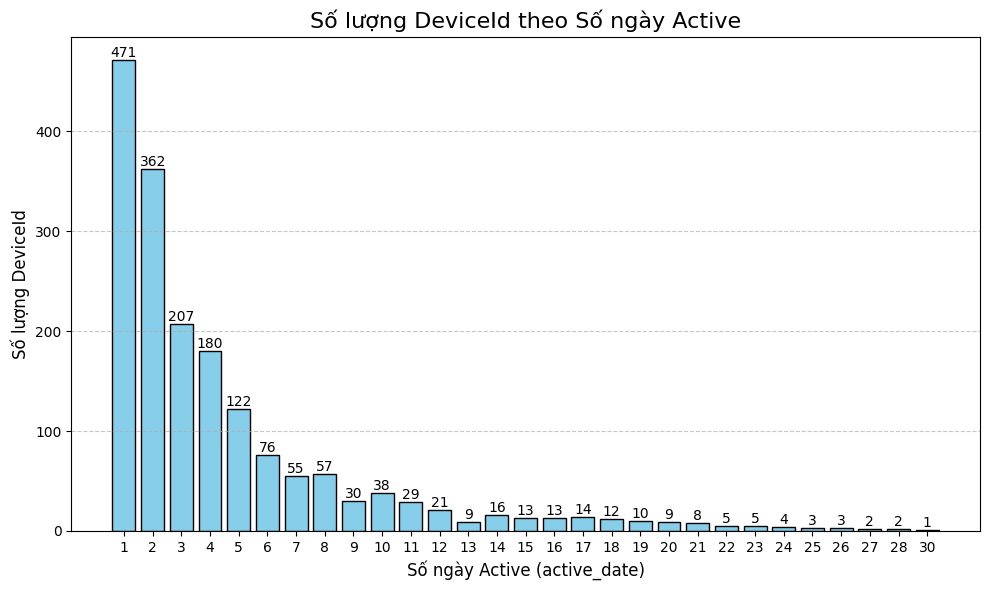

In [46]:
import matplotlib.pyplot as plt

active_date_0 = df_0['active_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(active_date_0.index.astype(str), active_date_0.values, color='skyblue', edgecolor='black')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),  # Y-coordinate
        f'{int(bar.get_height())}',  # Nội dung nhãn
        ha='center', va='bottom', fontsize=10
    )

plt.title('Số lượng DeviceId theo Số ngày Active', fontsize=16)
plt.xlabel('Số ngày Active (active_date)', fontsize=12)
plt.ylabel('Số lượng DeviceId', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Click noti của nhóm user nhận được 6 đến 13 tin/ngày

In [50]:
df_result_6_13 = df_result_1[(df_result_1['receive_noti'] > 6) & (df_result_1['receive_noti'] < 13)]

In [53]:
df_result_6_13

,deviceId,receive_noti,click_noti
1,0021ce02bd1067a8,12.0,0.052632
2,002270ddd580d1e6,9.0,0.066667
3,002a2111da49053b,12.0,0.217391
5,002ed7c6a409f651,8.0,0.000000
11,0052481776fe2e3e,7.0,0.000000
...,...,...,...
7111,ff58252989139bc3,7.0,0.000000
7112,ff5c0e013916d9c8,12.0,0.032258
7113,ff5f8cf63f026fb2,11.0,0.083333
7114,ffad4d43d4fff199,12.0,0.666667


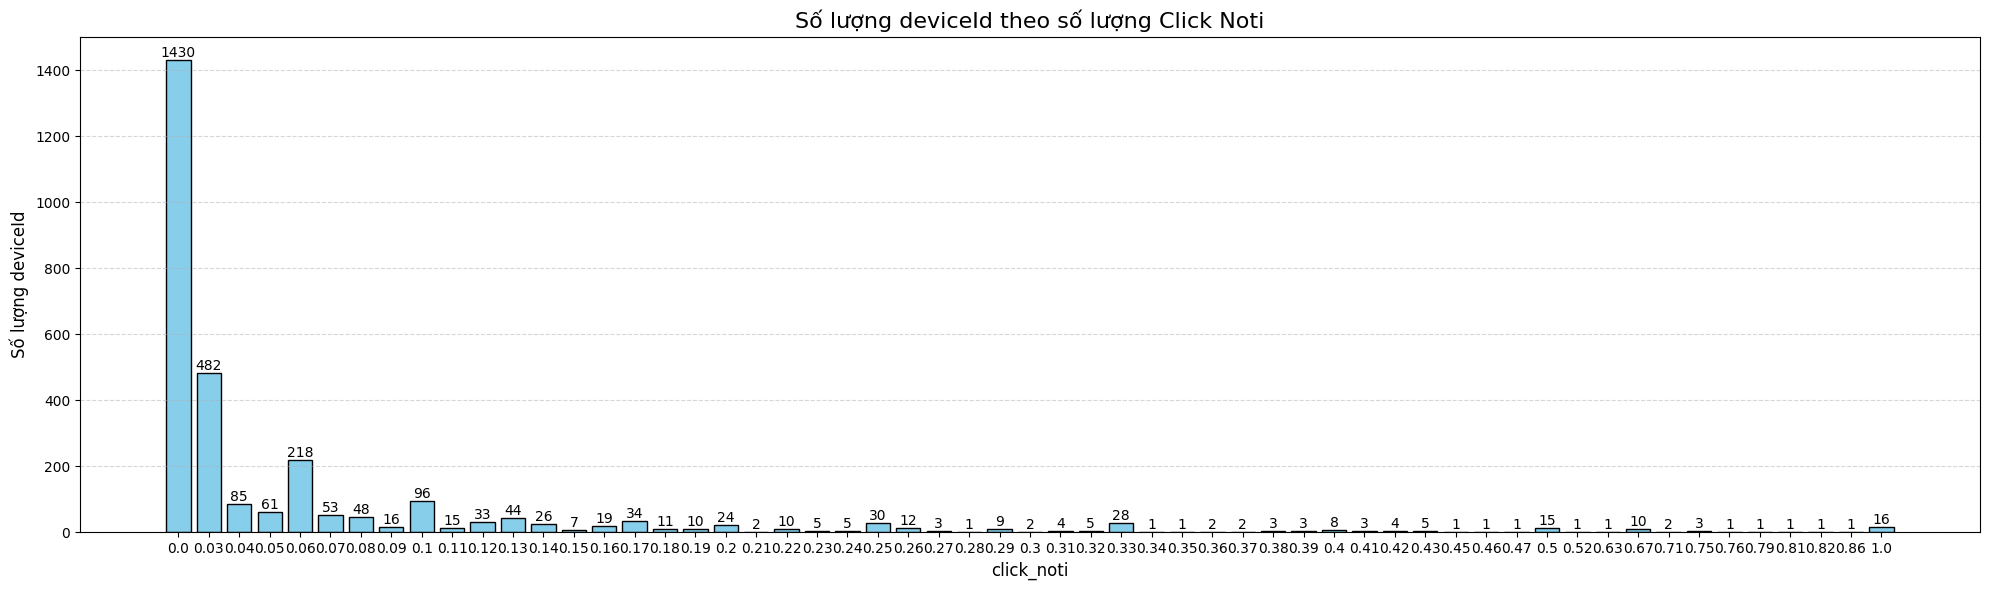

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
df_result_6_13_filter=df_result_6_13[df_result_6_13['click_noti']<=1]
receive_noti_counts = df_result_6_13_filter['click_noti'].round(2).value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
bars = plt.bar(receive_noti_counts.index.astype(str), receive_noti_counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),  # Y-coordinate
        f'{int(bar.get_height())}',  # Nội dung nhãn
        ha='center', va='bottom', fontsize=10
    )

plt.title('Số lượng deviceId theo số lượng Click Noti', fontsize=16)
plt.xlabel('click_noti', fontsize=12)
plt.ylabel('Số lượng deviceId', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
